![Airbnb](https://raw.githubusercontent.com/interviewquery/takehomes/airbnb_1/airbnb_1/logo.png)

# TAKE-HOME CHALLENGE: Data Science - Analytics

Airbnb is a two-sided marketplace that matches guests to hosts. The
booking flow at Airbnb is as follows: a guest finds an available room
(listing) that they like, and then they contact the host. Once the guest
finds a listing they are interested in, there are three ways to send the
host an inquiry: `contact_me`, `book_it`, or `instant_book` (detailed at
the bottom of this document). Upon receiving the inquiry, the host can
then decide whether or not to accept the request (for `contact_me` and
`book_it` methods; `instant_book` is auto-accepted). One of our
goals at Airbnb is to increase bookings on our platform.

## Prompt

You are the first data scientist to join a cross-functional Product and
Operations team working to grow bookings in Rio de Janeiro. The team
asks you for help with the following:

1.  What key metrics would you propose to monitor over time the success
    of the team's efforts in improving the guest host matching process
    and why? Clearly define your metric(s) and explain how each is
    computed.

2.  What areas should we invest in to increase the number of successful
    bookings in Rio de Janeiro? What segments are doing well and what
    could be improved? ​ ​Propose 2-3 specific recommendations (business
    initiatives and product changes) that could address these
    opportunities. Demonstrate rationale behind each recommendation AND
    prioritize your recommendations in order of their estimated impact.

3.  There is also interest from executives at Airbnb in the work you
    are doing, and a desire to understand the broader framing of the
    challenge of matching supply and demand, thinking beyond the data
    provided. What other research, experiments, or approaches could help
    the company get more clarity on the problem?

## Assignment
S​ummarize your recommendations in response to the questions above in a Jupyter Notebook intended for
the Head of Product and VP of Operations (who is not technical). Include
an organized appendix sharing the details of your work conducted for the
Rio team, that would be useful for the data team to understand your
work.






## Grading

Your assignment will be judged according to:

1.  The analytical approach and clarity of your graphs, tables,
    visualizations,

2.  The data decisions you made and reproducibility of the analysis,

3.  Strength of recommendations, prioritizations, and rationale behind
    those,

4.  The narrative of your presentation and ability to effectively
    communicate to non-technical executives, 5) How well you followed
    the directions.

## Data Provided

### `contacts.csv`​​
Contains a row for every time that a user makes an
inquiry for a stay at a listing in Rio de Janeiro.

-   `id_guest_anon` -​ id of the guest making the inquiry.

-   `id_host_anon` -​ id of the host of the listing to which the inquiry is
    made.

-   `id_listing_anon` -​ id of the listing to which the inquiry is made.

-   `ts_interaction_first` -​ UTC timestamp of the moment the inquiry is
    made.

-   `ts_reply_at_first` -​ UTC timestamp of the moment the host replies to
    the inquiry, if so.
- `ts_accepted_at_first` - UTC timestamp of the
    moment the host accepts the inquiry, if so.​
    
-    `ts_booking_at` - UTC
    timestamp of the moment the booking is made, if so.

-   `ds_checkin_first` -​ Date stamp of the check-in date of the inquiry.

-   `ds_checkout_first` ​- Date stamp of the check-out date of the inquiry.

-   `m_guests` ​- The number of guests the inquiry is for.

-   `m_interactions` -​ The total number of messages sent by both the guest
    and host.

-   `m_first_message_length_in_characters` -​ Number of characters in the
    first message sent by the guest, if a message was sent

-   `contact_channel_first` -​ The contact channel through which the
    inquiry was made. One of {contact_me, book_it, instant_book}. \*See
    bottom of page for more detail\*

-   `guest_user_stage_first` ​- Indicates whether the user has made a
    booking before sending the inquiry ("past booker"). If the user has
    not booked before, then the user is a new user.

### `listings.csv`
Contains data for every listing in the market

-   `id_listing_anon` ​- anonymized id of the listing

-   `room_type` -​ indicates whether the room is an entire home, private
    room, or shared room

-   `listing_neighborhood` -​ the neighborhood of the listing

-   `total_reviews` -​ the total number of reviews of the listing (at the
    time the data was pulled).

### Users
Contains data for every user

-   `id_user_anon` ​- anonymized id of user

-   `words_in_user_profile` - the number of words in the "about me"
    section of the user's Airbnb profile (at the time of contact)

-   `country` -​ origin country of the user

## Further Information

There are three ways to book a listing on Airbnb:

1)  `contact_me` -​ The guests writes a message to the host to inquire
    about the listing. The host has the option to 1) pre-​approve the
    guest to book their place, or 2) they can reject, or 3) they can
    write a free text message with no explicit acceptance or rejection.
    If the host pre-​approves, the guest can then go ahead and click to
    make the booking (but is not obligated to).

2)  `book_it` ​- The guest puts money down to book the place directly,
    but the host has to accept the reservation request. If the host
    accepts, the booking happens automatically. If you have used Airbnb
    before, this shows up as a button labeled "Request to book".

3)  `instant_book`​ -​ The guest books the listing directly, without any
    need for the host to accept or reject actively (it is auto​-accepted
    by the host). This shows up as a button labeled "Book".

### Note​
A host can opt-in to the `instant_book` feature. If a host
does so, a guest can use the `contact_me` or `instant_book` channels
for booking that particular listing, but cannot use the `book_it`
functionality. Alternatively, if a host does not opt in, a guest can use
the `contact_me` or `book_it` channels only. We suggest that you
browse the Airbnb website and look at listings to see the different ways
that you can message a host.


In [1]:
!git clone --branch airbnb_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/airbnb_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1968/1968), done.
remote: Compressing objects: 100% (1222/1222), done.
remote: Total 1968 (delta 755), reused 1933 (delta 729), pack-reused 0 (from 0)
Receiving objects: 100% (1968/1968), 299.41 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (755/755), done.
/content/takehomes/airbnb_1
contacts.csv  file.json  listings.csv  logo.png  takehomefile.ipynb  users.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
contacts = pd.read_csv('contacts.csv')
print(contacts.head())
contacts.info()
contacts.isna().sum().sort_values(ascending=False)


                          id_guest_anon                          id_host_anon  \
0  da8656a1-51af-4f38-b1c4-94be1f585157  5426897d-960d-4013-9e38-606ae746793c   
1  8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37  f30417c5-6df4-45ac-bfc2-6ad1cce398ab   
2  ebcd83ba-bda1-47eb-9680-2dd04ccf3988  13cbf50a-3272-45d4-9866-a06b6ea1b99a   
3  b0af8848-fe2a-4ef1-991e-26ab3066feb3  01614601-d5a4-4776-ab9b-c10d3b865bf0   
4  5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2  f2fed6f3-4c5c-453d-9e64-37c62b8bd06d   

                        id_listing_anon   ts_interaction_first  \
0  a408a8b2-0d44-4513-a611-3736d0409bb2    2016-04-21 02:55:53   
1  e387c705-0aeb-464c-9375-ece63be6f006    2016-02-16 22:14:01   
2  d1eb1960-938f-4305-a353-51e224414dd4    2016-01-27 23:33:38   
3  855f6779-346c-45fc-a64b-ea133250ca7a    2016-05-05 14:42:52   
4  f2928a59-c5e7-42b2-9c37-240a40f38dc0  2016-06-23 03:09:25.0   

       ts_reply_at_first   ts_accepted_at_first          ts_booking_at  \
0  2016-04-21 03:15:00.0  2016-04-21 03:15

,0
ts_booking_at,16300
ts_accepted_at_first,11472
ts_reply_at_first,2032
m_guests,1
id_host_anon,0
id_guest_anon,0
id_listing_anon,0
ts_interaction_first,0
ds_checkin_first,0
ds_checkout_first,0


In [17]:
print(contacts.describe())

           m_guests  m_interactions  m_first_message_length_in_characters
count  27886.000000    27887.000000                          27887.000000
mean       2.782041        8.255818                            193.712626
std        1.863797       10.035784                            183.172132
min        0.000000        1.000000                              0.000000
25%        2.000000        3.000000                             66.000000
50%        2.000000        5.000000                            154.000000
75%        4.000000       10.000000                            269.000000
max       16.000000      410.000000                           2341.000000


In [18]:
users = pd.read_csv('users.csv')
print(users.head())

                           id_user_anon country  words_in_user_profile
0  1d16a001-31a2-494c-a101-1f7b308adc62      FR                      0
1  42607e0a-86c0-472e-b633-9e192114e93c      AR                      0
2  25f85eb5-a700-44e1-b142-4c076222198d      BR                      0
3  55abeba0-18ef-4c58-80f4-3c278b706aca      BR                      1
4  5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b      BR                     98


In [19]:
listings = pd.read_csv('listings.csv')
print(listings.head())

                        id_listing_anon        room_type listing_neighborhood  \
0  71582793-e5f8-46d7-afdf-7a31d2341c79     Private room            -unknown-   
1  a1a3f728-e21f-4432-96aa-361d28e2b319  Entire home/apt           Copacabana   
2  353a68be-ecf9-4b7b-9533-c882dc2f0760  Entire home/apt      Barra da Tijuca   
3  b9ae1908-0486-40ac-bbcf-bd63ffebfe63  Entire home/apt                 Lapa   
4  fa0290ef-7881-4482-8981-8ebb1ce5dbfd  Entire home/apt            -unknown-   

   total_reviews  
0            0.0  
1            0.0  
2            3.0  
3            4.0  
4            0.0  


In [62]:
data = contacts.merge(
    users,
    left_on='id_guest_anon',
    right_on='id_user_anon',
    how='left',  # or 'inner' if you want only matched rows
    suffixes=('', '_user')  # To avoid name clashes
)
data = data.merge(listings, on='id_listing_anon', how='left')
#print(data.head())

In [53]:
#print(data.describe())

In [63]:
data = data.where(data['ds_checkin_first'] < data['ds_checkout_first'])
data = data.where(
    ~(
        data['id_guest_anon'].isna() |
        data['id_listing_anon'].isna() |
        data['id_host_anon'].isna()
    )
)
datetime_cols = [
    'ts_interaction_first', 'ts_reply_at_first',
    'ts_accepted_at_first', 'ts_booking_at',
    'ds_checkin_first', 'ds_checkout_first'
]

for col in datetime_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

#print(data.head())

<Axes: >

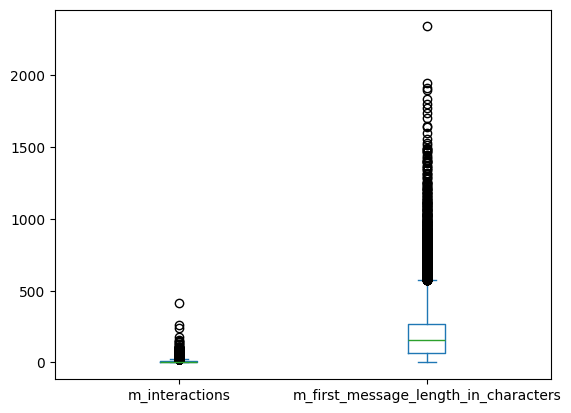

In [64]:
#feature enginearing contacts
data['response_time'] = (
    data['ts_reply_at_first'] - data['ts_interaction_first']
).dt.total_seconds()
data['was_booked'] = data['ts_booking_at'].notna().astype(int)
data['stay_length'] = (
    data['ds_checkout_first'] - data['ds_checkin_first']
).dt.days
data['booking_lag'] = (
    data['ds_checkin_first'] - data['ts_booking_at']
).dt.days

data['accept_time_sec'] = (
    data['ts_accepted_at_first'] - data['ts_interaction_first']
).dt.total_seconds()

data['inquiry_weekday'] = data['ts_interaction_first'].dt.dayofweek  # 0 = Monday
data['was_replied'] = data['ts_reply_at_first'].notna().astype(int)

features_drop = [
    'ts_interaction_first', 'ts_reply_at_first',
    'ts_accepted_at_first', 'ts_booking_at',
    'ds_checkin_first', 'ds_checkout_first'
]
data[['m_interactions', 'm_first_message_length_in_characters']].plot(kind='box')


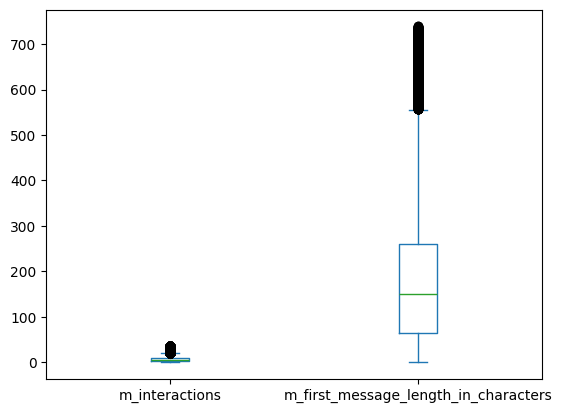

In [65]:
data['m_interactions'] = data['m_interactions'].where(data['m_interactions'] < 38)
data['m_first_message_length_in_characters'] = data['m_first_message_length_in_characters'].where(data['m_first_message_length_in_characters'] < 740)
data[['m_interactions', 'm_first_message_length_in_characters']].plot(kind='box')
data.rename(columns={'m_first_message_length_in_characters': 'message_len'}, inplace=True)


In [66]:
data.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'message_len', 'contact_channel_first',
       'guest_user_stage_first', 'id_user_anon', 'country',
       'words_in_user_profile', 'room_type', 'listing_neighborhood',
       'total_reviews', 'response_time', 'was_booked', 'stay_length',
       'booking_lag', 'accept_time_sec', 'inquiry_weekday', 'was_replied'],
      dtype='object')

In [67]:
non_numeric_cols = data.select_dtypes(exclude='number').columns
#print(non_numeric_cols)
#print(data[non_numeric_cols])


In [75]:
from sklearn.preprocessing import LabelEncoder
"""
categorical_cols = [
    'contact_channel_first',
    'guest_user_stage_first',
    'room_type',
    'listing_neighborhood',
    'country'
]

for col in categorical_cols:
    le = LabelEncoder()
    # Fill missing values before encoding to avoid errors
    data[col] = data[col].fillna('missing')
    data[col] = le.fit_transform(data[col])

columns_to_drop = [
    'id_guest_anon', 'id_host_anon', 'id_listing_anon',
    'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
    'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first',
    'id_user_anon'
]
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')"""


"\ncategorical_cols = [\n    'contact_channel_first',\n    'guest_user_stage_first',\n    'room_type',\n    'listing_neighborhood',\n    'country'\n]\n\nfor col in categorical_cols:\n    le = LabelEncoder()\n    # Fill missing values before encoding to avoid errors\n    data[col] = data[col].fillna('missing')\n    data[col] = le.fit_transform(data[col])\n\ncolumns_to_drop = [\n    'id_guest_anon', 'id_host_anon', 'id_listing_anon',\n    'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',\n    'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first',\n    'id_user_anon'\n]\ndata.drop(columns=columns_to_drop, inplace=True, errors='ignore')"

In [70]:
print(data.shape)
print(data.columns)
print(data.head())


(27979, 17)
Index(['m_guests', 'm_interactions', 'message_len', 'contact_channel_first',
       'guest_user_stage_first', 'country', 'words_in_user_profile',
       'room_type', 'listing_neighborhood', 'total_reviews', 'response_time',
       'was_booked', 'stay_length', 'booking_lag', 'accept_time_sec',
       'inquiry_weekday', 'was_replied'],
      dtype='object')
   m_guests  m_interactions  message_len  contact_channel_first  \
0       4.0            30.0         31.0                      0   
1       5.0             2.0        312.0                      1   
2       1.0             3.0        164.0                      1   
3       2.0             3.0        203.0                      1   
4       3.0            25.0          0.0                      2   

   guest_user_stage_first  country  words_in_user_profile  room_type  \
0                       2       21                      0          0   
1                       2       36                      0          0   
2          

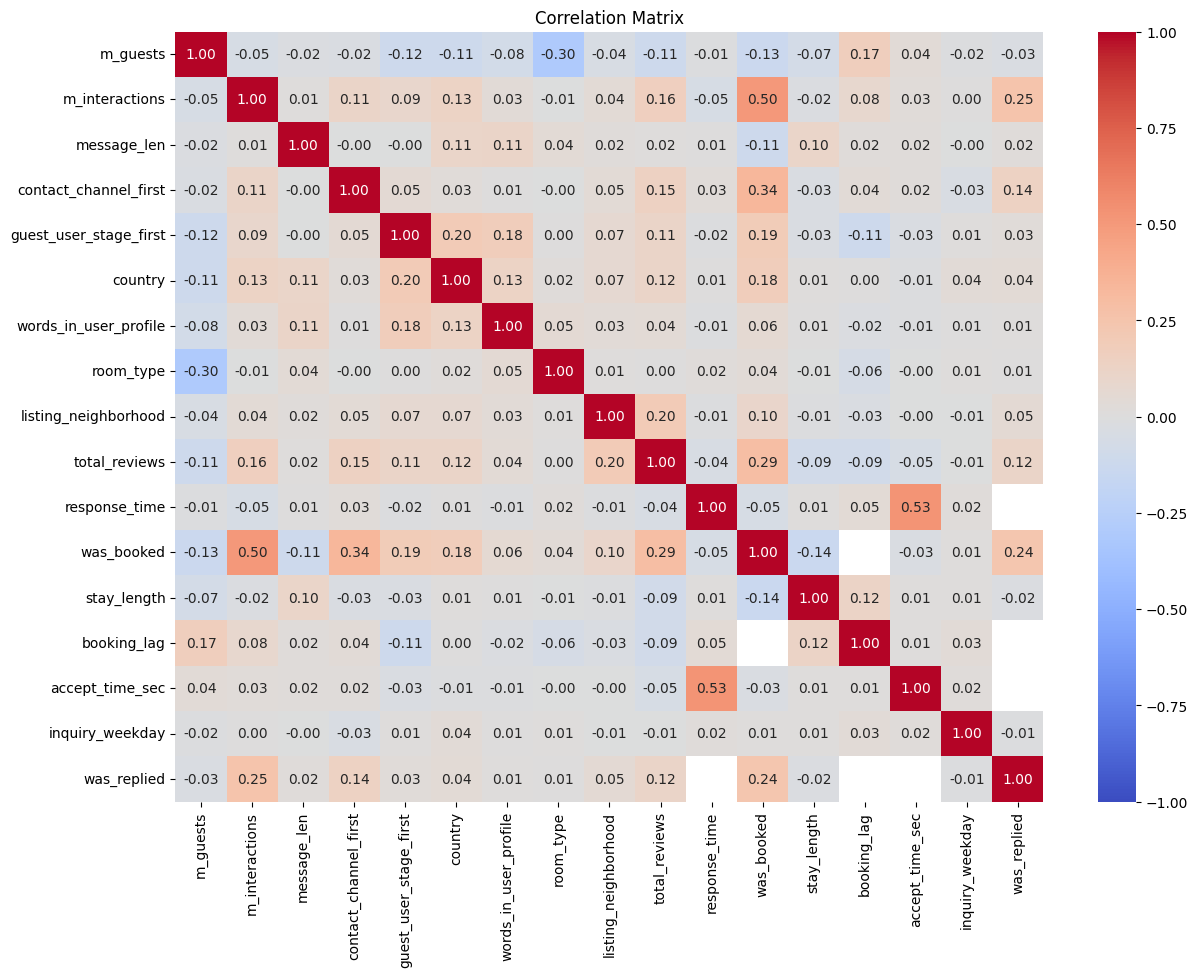

In [71]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [80]:
conversion_rate = data.groupby('day')['was_booked'].mean()
response_time = data.groupby('week')['response_time'].median()
acceptance_rate = data.groupby('week')['was_accepted'].mean()  # if you have was_accepted column

# Example plots
conversion_rate.plot(title='Daily Booking Conversion Rate')
response_time.plot(title='Weekly Median Response Time')


KeyError: 'week'